<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 1 // Publication-Grade Plot</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 1: Publication-Grade Plot\
>Last Updated: 27 Juli 2022

>Author: Rizky Andri Nurachman

## Publication-grade Plot Introduction

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

* `lsoa_code`: this represents a policing area
* `borough`: the london borough for which the statistic is related
* `major_category`: the major crime category
* `minor_category`: the minor crime category
* `value`: the count of the crime for that particular borough, in that particular month
* `year`: the year of the summary statistic
* `month`: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

* What is the change in the number of crime incidents from 2011 to 2016?
* What were the top 3 crimes per borough in 2016?

Please make sure that you have completed the session for this course, namely Advanced Visualization which is part of this Program.

Note: You can take a look at Project Rubric below:

Criteria |	Meet Expectations
---|---
Area Plot |	Mengimplementasikan Area Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik
Histogram |	Mengimplementasikan Histogram Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Bar Chart | Mengimplementasikan Bar Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Pie Chart |	Mengimplementasikan Pie Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Box Plot |	Mengimplementasikan Box Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Scatter Plot |	Mengimplementasikan Scatter Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Word Clouds |	Mengimplementasikan Word Clouds Menggunakan `Wordclouds` Library Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.
Folium Maps |	Mengimplementasikan London Maps Menggunakan `Folium`.
Preprocessing |	Student Melakukan Preproses Dataset Sebelum Menerapkan Visualisasi. | | Apakah Kode Berjalan Tanpa Ada Eror?
Apakah Kode Berjalan Tanpa Ada Eror? |	Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.
Area Plot |	Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat
Histogram |	Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat
Bar Chart |	Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat
Pie Chart |	Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat
Box Plot |	Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat
Scatter Plot |	Menarik Informasi/Kesimpulan Berdasarkan Scatter Plot Yang Telah Student Buat
Overall Analysis |	Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

**Focus on "Graded-Function" sections.**

------------

Catatan tambahan assignment:
komentar untuk assignment menggunakan bahasa Indonesia untuk membedakan mana template dan tambahan dan memiliki format khusus seperti kalimat dibawah.

>Langkah pertama adalah melakukan import libraries yang dibutuhkan

In [1]:
#masukkan semua libraries yang dibutuhkan
import numpy as np
import pandas as pd
import folium
from folium import plugins
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

>import data london_crime_by_lsoa.csv, lalu lakukan pengecekan standar untuk melihat isi data seperti head(), info() dll.

In [2]:
df_lsoa = pd.read_csv('london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Let's view the top 5 rows of the dataset using the head() function.
df_lsoa.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [5]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


>Lihat lebih lanjut berapa tahun minimum dan maksimum dari data frame

In [6]:
df_lsoa.agg(('min','max'))

,lsoa_code,borough,major_category,minor_category,value,year,month
min,E01000001,Barking and Dagenham,Burglary,Assault with Injury,0,2008,1
max,E01033746,Westminster,Violence Against the Person,Wounding/GBH,309,2016,12


>dapat dilihat bahwa tahun kejahatan tersimpan dari tahun 2008 hingga tahun 2016

To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [7]:
df_lsoa.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [8]:
df_lsoa.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

To view the dimensions of the dataframe, we use the `.shape` parameter.

In [9]:
df_lsoa.shape

(13490604, 7)

>Terlihat bahwa data terdiri dari 13,49 juta baris dan 7 kolom

>selanjutnya adalah Cek Data Frame apakah ada nilai yang null ?

In [10]:
df_lsoa.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

>Data Frame sudah tidak ditemukan kategori null (tidak diperlukan imputasi) sehingga bisa diolah lebih lanjut

Let's make one dataset that contains value 1 in value features.

In [45]:
#buat variabel criminal yang memanggil nilai di kolom value = 1
criminal = df_lsoa.loc[df_lsoa['value'] == 1]

# ANALISIS DATA FRAME
Data frame dari lsoa ini perlu diolah terlebih dahulu agar dapat siap diplot untuk visualisasi. Pengolahan yang akan dilakukan:
1. Merekap total kejahatan baik yang major maupun minor terhadap tahun
2. membuat kompilasi rekap kejahatan dari tahun ke tahun sejak 2008-2016

>sebelum pengolahan data, pertama-tama kita buat variable array list terlebih dahulu yang kira2 dibutuhkan saat pembuatan algoritma untuk rekap data

In [44]:
# Membuat list year/tahun
tahun = list(map(int,np.sort(df_lsoa.year.unique())))

# Membuat list borough / wilayah
wilayah = list(df_lsoa.borough.unique())

# Membuat list major category 
kategori_major = list(df_lsoa.major_category.unique())

# Membuat list minor category
kategori_minor = list(df_lsoa.minor_category.unique())

# Membuat list bulan agar gampang dipanggil 
bulan_angka = list(range(1,13))
bulan_huruf = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


>PENGOLAHAN DAN REKAP DATA FRAME

Kondisi data frame df_lsoa saat ini masih tercecer sehingga perlu dilakukan rekap data. Rekap akan menciptakan data frame baru yang bisa digunakan untuk visualisasi serta analisis. Data frame yang akan dibuat antara lain :

1. Data frame df_crime_major_years = data frame berisi kompilasi total hitungan kejahatan major (index) terhadap tahun kumulatif (kolom/features) ditambah dengan jumlah total kejahatan

2. Data frame df_crime_minor_years = data frame berisi kompilasi total hitungan kejahatan minor (index) terhadap tahun kumulatif (kolom/features) ditambah dengan jumlah total kejahatan

3. Data frame df_borough_years = data frame berisi kompilasi total kasus kejahatan terhadap wilayah tiap tahun

4. Data frame df_month_years = data frame berisi kompilasi total kasus kejahatan tiap tahun per bulan

DATA FRAME REKAP KEJAHATAN MAJOR TERHADAP TAHUN

In [43]:
#1. Data frame df_crime_major_years, data frame 1,indexnya yang paling kiri = major_category, features = tahun, total = rekap kejahatan total dari semua tahun
data = {}
for year in tahun:
     major_per_year = df_lsoa.loc[df_lsoa['year'] == year].groupby('major_category')['value'].sum()
      
    #year series 
     data[year] = pd.Series(
     data = map(int, major_per_year.reset_index()['value'].values),
     index = major_per_year.index
    )

#data frame rekap dari major categori dan tahun
df_crime_major_years=pd.DataFrame(
    columns=tahun, index=kategori_major, data = data
)
#membuat kolom total
df_crime_major_years['Total'] = df_crime_major_years[tahun].sum(axis=1)
#menyortir data
df_crime_major_years.sort_values(by='Total', ascending=False, inplace=True)


In [15]:
#lihat hasil rekap data major crime terhadap tahun
df_crime_major_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


In [58]:
df_crime_major_years.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273


>secara sekilas terlihat bahwa dari 2008 hingga  2016 kejahatan major paling banyak adalah theft and handling, sedangkan yang paling sedikit adalah sexual offences

DATA FRAME REKAP KEJAHATAN MINOR TERHADAP TAHUN

In [17]:
#1. Data frame df_crime_minor_years, data frame 1,indexnya yang paling kiri = minor_category, features = tahun, total = rekap kejahatan total dari semua tahun
data = {}
for year in tahun:
     minor_per_year = df_lsoa.loc[df_lsoa['year'] == year].groupby('minor_category')['value'].sum()
      
    #year series 
     data[year] = pd.Series(
     data = map(int, minor_per_year.reset_index()['value'].values),
     index = minor_per_year.index
    )

#data frame rekap dari major categori dan tahun
df_crime_minor_years=pd.DataFrame(
    columns=tahun, index=kategori_minor, data = data
)
#membuat kolom total
df_crime_minor_years['Total'] = df_crime_minor_years[tahun].sum(axis=1)
#menyortir data
df_crime_minor_years.sort_values(by='Total', ascending=False, inplace=True)


In [56]:
#lihat hasil rekap data minor crime terhadap tahun
df_crime_minor_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


In [57]:
df_crime_minor_years.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Other Drugs,373,307,396,321,321,372,296,293,319,2998
Other Fraud & Forgery,1485,0,0,0,0,0,0,0,0,1485
Other Sexual,1005,0,0,0,0,0,0,0,0,1005
Murder,130,119,113,105,95,96,81,109,101,949
Rape,268,0,0,0,0,0,0,0,0,268


>hasil dari rekap ini memberikan gambaran kejahatan terbanyak dari 2008 hingga 2016 berupa pencurian yg tidak spesifik (other category), dan paling sedikit adalah rape

DATA FRAME REKAP WILAYAH PER TAHUN

In [51]:
#1. Data frame df_borough_years, data frame 1,indexnya yang paling kiri = wilayah, features = tahun, total = rekap kejahatan total dari semua tahun
data = {}
for year in tahun:
     borough_per_year = df_lsoa.loc[df_lsoa['year'] == year].groupby('borough')['value'].sum()
      
    #year series 
     data[year] = pd.Series(
     data = map(int, borough_per_year.reset_index()['value'].values),
     index = borough_per_year.index
    )

#data frame rekap dari major categori dan tahun
df_borough_years=pd.DataFrame(
    columns=tahun, index=wilayah, data = data
)
#membuat kolom total
df_borough_years['Total'] = df_borough_years[tahun].sum(axis=1)
#menyortir data
df_borough_years.sort_values(by='Total', ascending=False, inplace=True)


In [52]:
#lihat hasil rekap data wilayah terhadap tahun
df_borough_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [59]:
df_borough_years.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
City of London,0,0,0,69,157,110,115,151,178,780


>dari data ini kita mendapatkan gambaran ternyata wilayah kejahatan terbanyak ada di westminster, dan paling sedikit adalah di london

DATA FRAME REKAP TOTAL KEJAHATAN TIAP BULAN PER TAHUN

In [69]:
#1. Data frame df_month_years, data frame 1,indexnya yang paling kiri = bulan, features = tahun, total = rekap kejahatan total dari semua tahun
data = {}
for year in tahun:
     month_per_year = df_lsoa.loc[df_lsoa['year'] == year].groupby('month')['value'].sum()
      
    #year series 
     data[year] = pd.Series(
     data = map(int, month_per_year.reset_index()['value'].values),
     index = month_per_year.index
    )

#data frame rekap dari major categori dan tahun
df_month_years=pd.DataFrame(
    columns=tahun, index=range(1,13,1), data = data
)
#membuat kolom total
df_month_years['Total'] = df_month_years[tahun].sum(axis=1)
#menyortir data dan ganti dari bulan_angka ke bulan_huruf
month_index = {}
for p in range(1,13,1):
    month_index[p] = bulan_huruf[p-1]
df_month_years.rename(index=month_index, inplace=True)



In [73]:
#lihat head dan tail
df_month_years.head(12)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
January,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
February,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
April,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704
June,62290,63116,62632,61822,62281,56839,57039,60760,62262,549041
July,64126,63281,63764,62428,63280,60508,58564,61606,65519,563076
August,59959,58695,59040,59117,62143,57467,55641,58056,62666,532784
September,58414,57847,59731,58640,56912,54924,56933,57564,61412,522377
October,63354,61176,62113,63622,61728,59956,60537,62361,63405,558252


In [75]:
#coba diurutkan total kejahatan
df_month_years.sort_values('Total', ascending=False)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
July,64126,63281,63764,62428,63280,60508,58564,61606,65519,563076
October,63354,61176,62113,63622,61728,59956,60537,62361,63405,558252
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
November,61395,59456,60665,64119,62514,58267,59704,62487,61064,549671
June,62290,63116,62632,61822,62281,56839,57039,60760,62262,549041
August,59959,58695,59040,59117,62143,57467,55641,58056,62666,532784
January,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
September,58414,57847,59731,58640,56912,54924,56933,57564,61412,522377
April,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648


>kejahatan paling banyak terjadi di bulan juli dan paling sedikit di bulan februari

## Visualizing Data using Matplotlib<a id="8"></a>


In [ ]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

## Area Plots (Series/Dataframe) <a id="12"></a>
>Akan dilakukan visualisasi line plot dari data frame yang telah dibuat diatas. Karena line plot lebih cocok untuk time series, data frame yang akan digunakan beberapa akan dilakukan transpose agar menyesuaikan dengan sumbu x.

Pertanyaannya adalah sebagai berikut:

>1. Bagaimanakah tren total kasus kejahatan yang terjadi di setiap bulan, dari tahun 2008 hingga 2016 ?

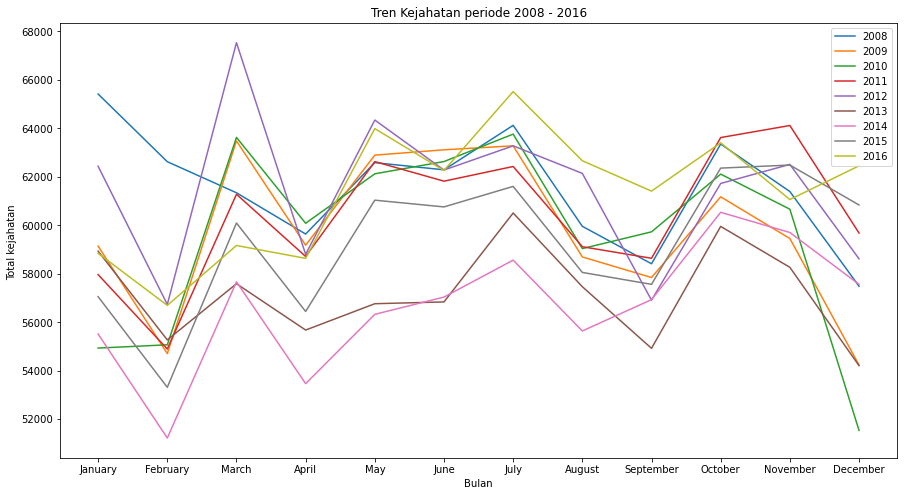

In [78]:
# Write your function below
ax = df_month_years[tahun].plot(figsize=(15,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(bulan_huruf)
ax.legend(loc='upper right')
plt.title('Tren Kejahatan periode 2008 - 2016', fontsize=12)
plt.ylabel('Total kejahatan ') # add y-label
plt.xlabel('Bulan') # add x-label

plt.show()

ANALISIS TRENDING 1
>Terdapat sebuah pola yang menarik, yaitu terdapat penurunan kasus kejahatan dari januari ke februari, tapi kembali naik ke bulan maret, lalu turun kembali. Pola menarik lain terdapat di akhir tahun dimana kejahatan menurun drastis. Melihat bahwa di bulan desember hingga februari merupakan musim dingin, berarti **terdapat korelasi bahwa memasuki musim dingin membuat kejahatan jadi berkurang, dan kembali beraksi di bulan maret dimana cuaca sudah lebih hangat. Informasi ini bisa memberikan insight kepada polisi agar meningkatkan keamanan saat musim dingin akan berlalu, terutama di bulan maret.**

Pertanyaan selanjutnya adalah:
>2. Bagaimanakah tren kejahatan major dari tahun 2008 hingga 2016 ?

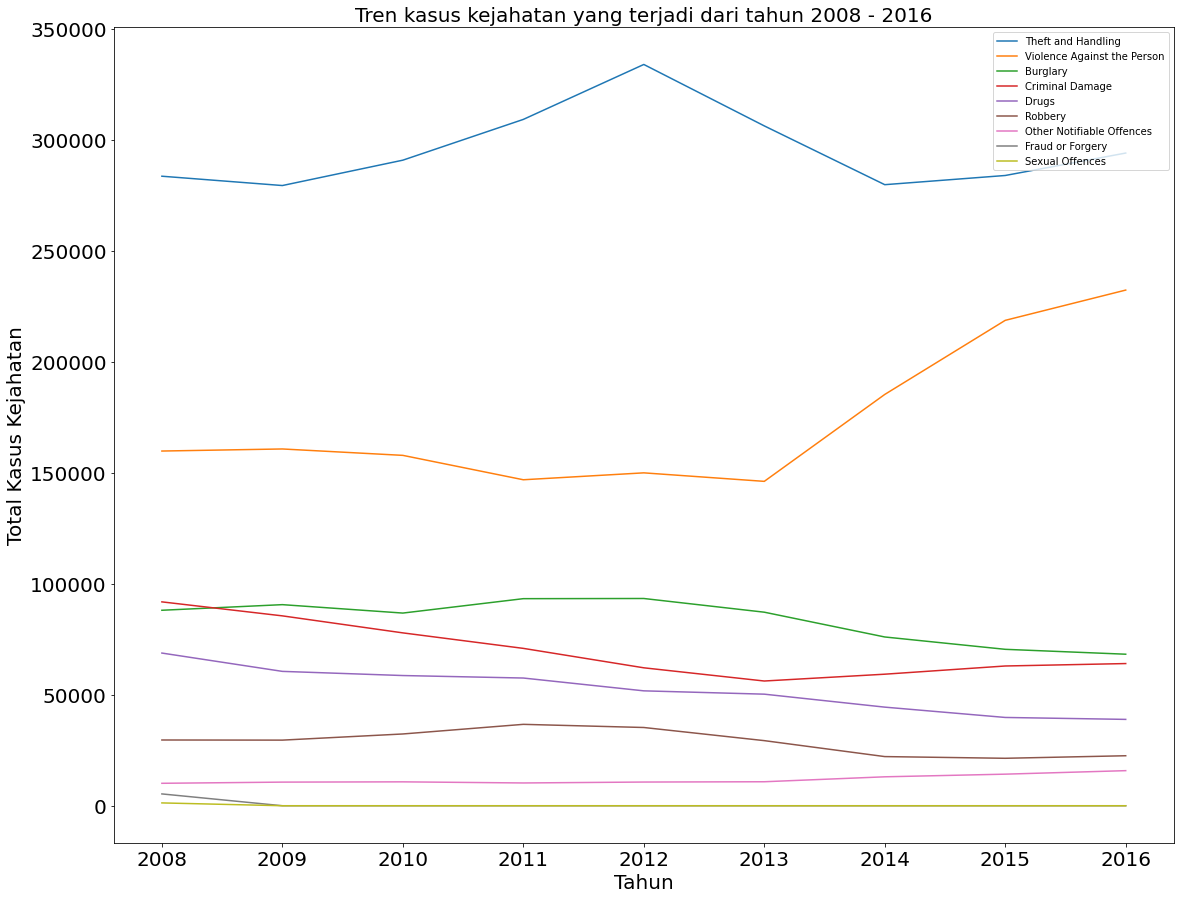

In [84]:
df_crime_major_years[tahun].transpose().plot(figsize=(19,15))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren kasus kejahatan yang terjadi dari tahun 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

ANALISIS TRENDING 2

>Dari tahun ke tahun, kejahatan paling banyak tetap berada pada kategori pencurian dan penyelundupan, namun yang menjadi perhatian adalah tren kejahatan kekerasan yang terus mengalami kenaikan sejak 2013.**informasi ini bisa memberikan insight pada polisi untuk menyelidiki lebih lanjut, tindak kekerasan apa yang terjadi, sehingga bisa dibuat strategi / peraturan yang dapat menekan tindak kekerasan di tahun selanjutnya** 

Pertanyaan selanjutnya:
>3. Bagaimana trending kejahatan minor dari 2008 - 2016 ?


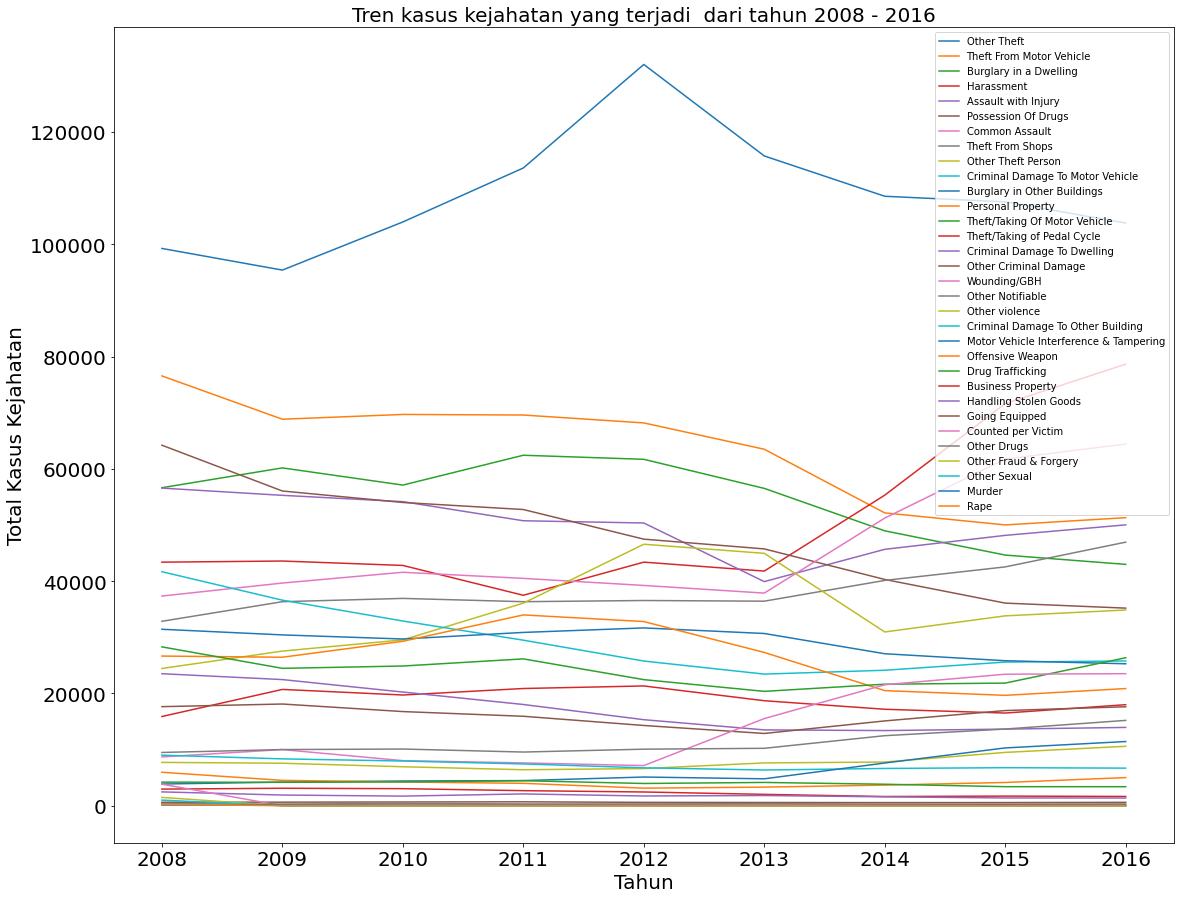

In [85]:
df_crime_minor_years[tahun].transpose().plot(figsize=(19,15))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren kasus kejahatan yang terjadi  dari tahun 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

ANALISIS TRENDING 3
> Seperti kejahatan major, peringkat 1 kejahatan minor ada di pencurian kategori umum, namun yang perlu diperhatikan adalah di tren kenaikan kejahatan. Terdapat 2 kategori yang mengalami peningkatan menuju 2016, dan warnanya agak sulit dibedakan karena sama dengan kategori yang lain, mari kita lihat total ranking kategori kejahatan di tahun 2016 yang menempati peringkat 2 dan 3!

In [121]:
#ambil ranking kategori di tahun 2016
df_crime_minor_years.loc[:, 2016].sort_values(ascending=False)

Other Theft                               103807
Harassment                                 78676
Common Assault                             64440
Theft From Motor Vehicle                   51319
Assault with Injury                        50038
Theft From Shops                           46957
Burglary in a Dwelling                     42996
Possession Of Drugs                        35203
Other Theft Person                         34868
Theft/Taking Of Motor Vehicle              26366
Criminal Damage To Motor Vehicle           25787
Burglary in Other Buildings                25289
Wounding/GBH                               23525
Personal Property                          20874
Theft/Taking of Pedal Cycle                18001
Other Criminal Damage                      17633
Other Notifiable                           15205
Criminal Damage To Dwelling                13951
Motor Vehicle Interference & Tampering     11438
Other violence                             10588
Criminal Damage To O

>Dapat disimpulkan bahwa **kenaikan trending dari kategori kejahatan harassment dan common assault perlu menjadi perhatian agar tidak terus meningkat di tahun selanjutnya**

Pertanyaan terakhir untuk kategori line plot:
>4. Bagaimana trending kejahatan dari tahun 2008-2016 berdasarkan wilayah?

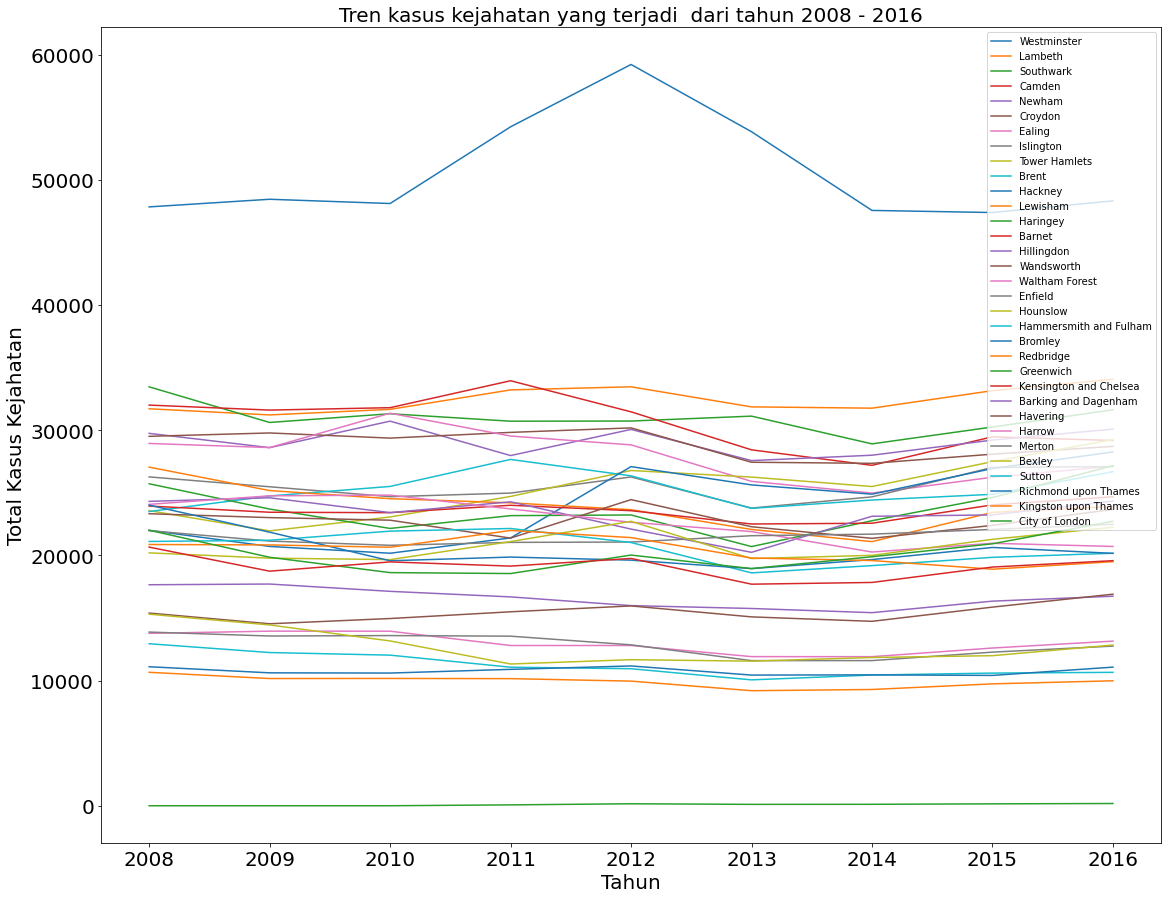

In [122]:
df_borough_years[tahun].transpose().plot(figsize=(19,15))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren kasus kejahatan yang terjadi  dari tahun 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

ANALISIS TRENDING 4
> Secara gambaran umum tidak terlihat ada pola / tren yang spesial pada wilayah selain westminster. **insight yang dapat diberikan hanyalah perhatian lebih terhadap tingkat kejahatan di westminster yang tetap tinggi dibandingkan wilayah lain dari tahun ke tahun**

## Histogram

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question:**

>1. Bagaimana pemetaan distribusi frekuensi kasus kejahatan dari setiap wilayan , setiap tahunnya ?

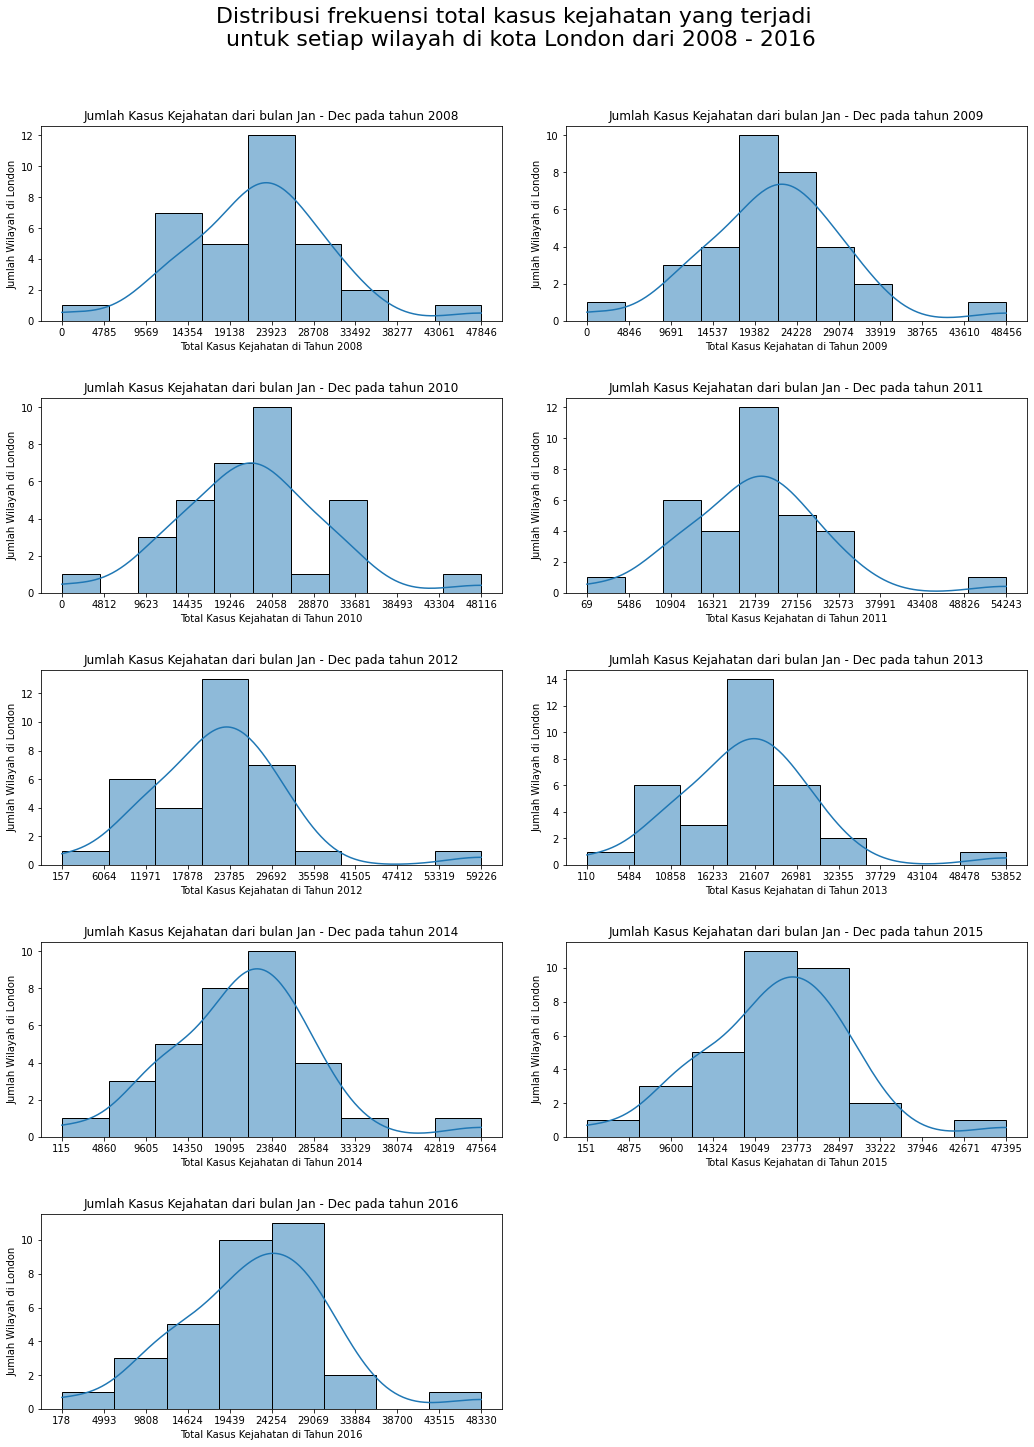

In [123]:
n_rows = int(len(tahun))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot number dari 1

for i in tahun:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_borough_years[tahun][i])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_borough_years[tahun][i],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(i))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(i), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

>**Insight:**

>**Analisis Keseluruhan** <br>
>1. Mayoritas grafik histogram yang ditampilkan adalah **distribusi normal**
>2. Dari tahun 2008 - 2016 memiliki rata-rata mayoritas total kasus kejahatan pada kisaran sekitar **23.000an - 26.000an** kejadian
>3. Nilai ekstrim untuk total kasus kejahatan yang terjadi ditemukan dari tahun **2008 - 2016**. Nilai ekstrim ini bisa dengan lebih detail diketahui dengan menggunakan visualisasi seperti **Boxplot**. Contoh nilai ekstrim yang ada pada histogram ini, seperti ada wilayah dengan total kasus kejahatan yang relatif sangat kecil dari biasanya yaitu pada kisaran **0 - 4.785** kejadian dan ada wilayah dengan total kasus kejahatan yang relatif sangat besar dari biasanya yaitu pada kisaran **43.061 - 47.46** kejadian pada tahun **2008**

## Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

**Question:**

>1. 5 wilayah apa saja yang total kasus kejahatannya paling tinggi dari tahun 2008 - 2016?


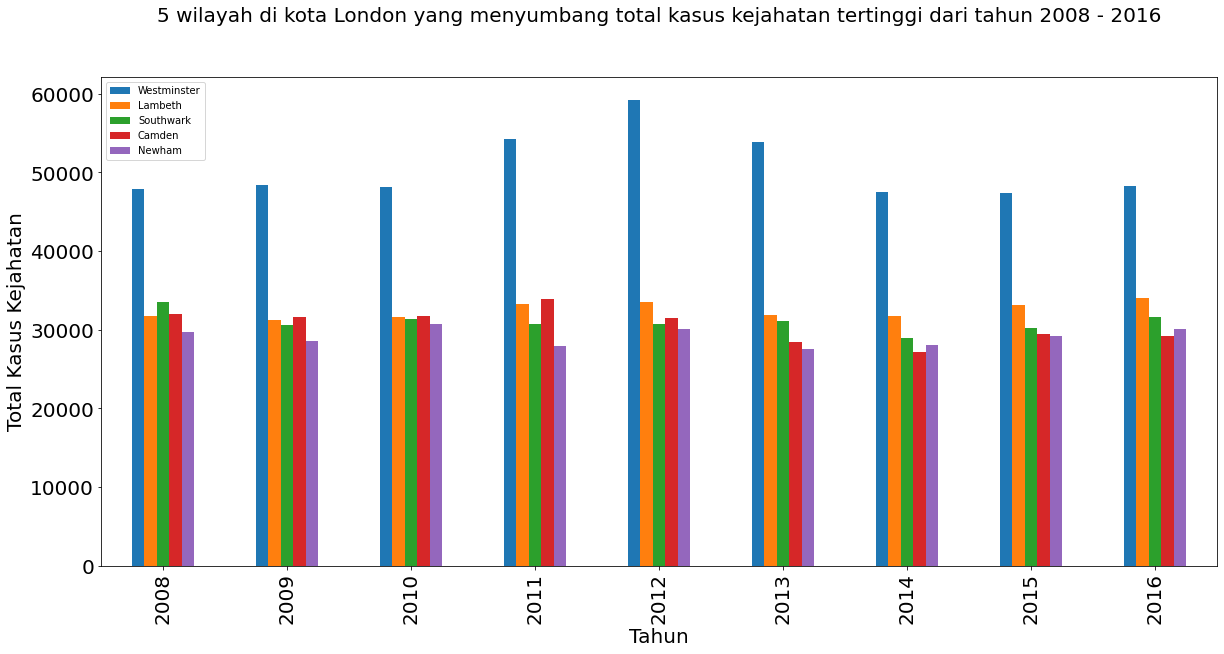

In [125]:
df_borough_years[tahun].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London yang menyumbang total kasus kejahatan tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

**Insight:**

>Seperti gambar grafik batang di atas, wilayah **Westminster** menjadi wilayah dengan total kasus kejahatan tertinggi dari tahun 2008 - 2016. Selisihnya dengan keempat wilayah lainnya juga relatif cukup jauh rentangnya. <br>
Perlu disiapkan strategi penanganan dari kepolisian di tahun-tahun berikutnya untuk menekan angka kasus kejahatan **khususnya di wilayah Westminster**

>2. 5 wilayah apa saja yang total kasus kejahatannya paling rendah dari tahun 2008 - 2016?

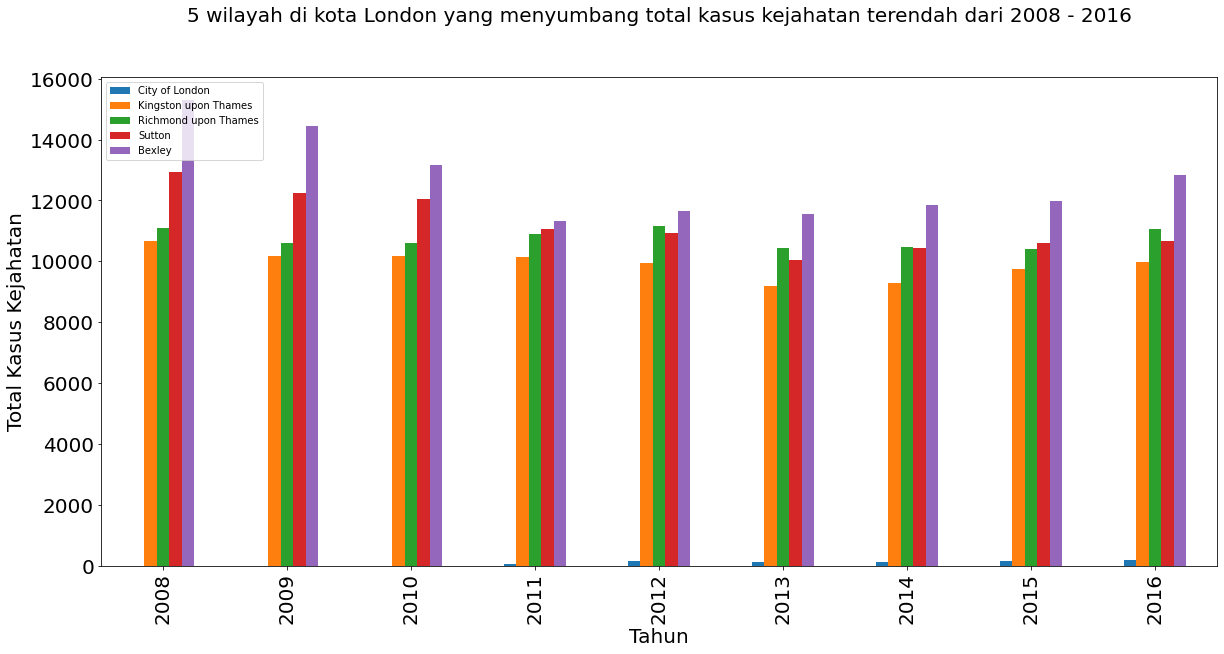

In [126]:
df_borough_years.sort_values(by='Total')[tahun].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London yang menyumbang total kasus kejahatan terendah dari 2008 - 2016', fontsize=20, y=1.1)
plt.show()

Wilayah **City of London** menjadi wilayah dengan total kasus kejahatan terendah dari tahun 2008 - 2016. Total kasus kejahatannya juga terbilang **sangat rendah** dibandingkan dengan empat wilayah lainnya yang masuk menjadi 5 wilayah dengan total kasus kejahatan terendah. Tampaknya wilayah ini menjadi wilayah yang relatif paling aman. <br>
**Perlu diselidiki apakah ada korelasi wilayah city of london dengan wilayah sekitar apakah memang relatif rendah juga, dan bisa dicross check juga dengan data penduduk apakah mayoritas berlatar belakang imigran atau bukan**

## Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

**Question:**

>1. Tunjukkan persentase dan 3 major category yang menyumbang total kasus kejahatan tertinggi pada rentang tahun tersebut?

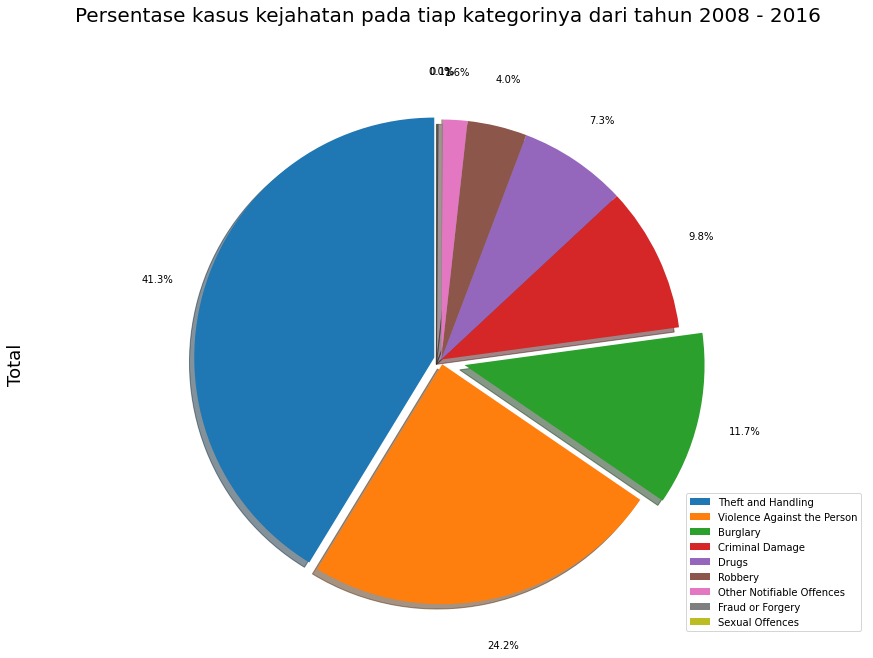

In [128]:
# ratio for each category crime with which to offset each wedge.
explode_list = [0.03, 0.02, 0.1, 0, 0, 0, 0, 0, 0]
df_pie = df_crime_major_years['Total']
df_pie.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,         # turn off labels on pie chart
            pctdistance=1.2,# the ratio between the center of each pie slice and the start of the text generated by autopct
            explode=explode_list  # 'explode' top 3 major_category
            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase kasus kejahatan pada tiap kategorinya dari tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index.values, loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

**Insight:**

**3 kejahatan terbesar ada pada Theft and Handling; Violence Against the Person; Burglary** menjadi tiga kategori kejahatan mayor yang menyumbang total kasus kejahatan dengan **persentase tertinggi** dari tahun 2008 - 2016. Rincian masing-masing kategori mayor tersebut adalah sebagai berikut: <br>
1. Theft and Handling(pencurian dan penyelundupan) sebesar **41,3%** dengan total kasus kejahatan **2.661.861**
2. Violence Against the Person (KDRT / penganiayaan) sebesar **24,2%** dengan total kasus kejahatan **1.558.081**
3. Burglary (perampokan)sebesar **11,7%** dengan total kasus kejahatan **754.293**

## Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

**Question:**

>1. Bagaimana representasi statistik dari distribusi total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

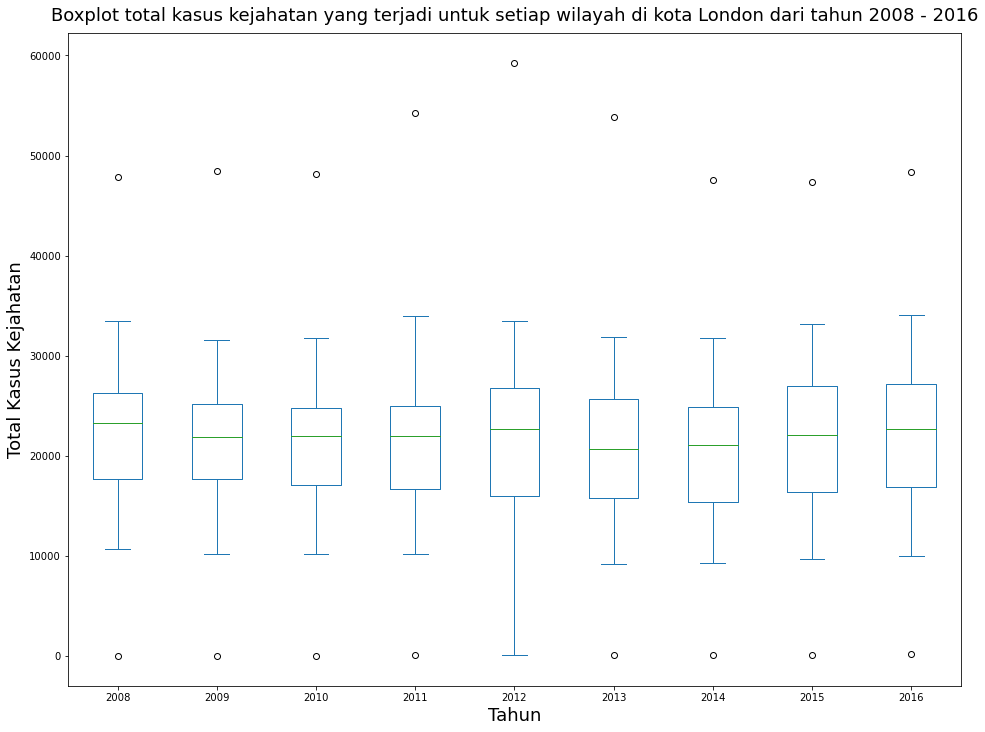

In [130]:
df_borough_years[tahun].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap wilayah di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

**Insight:**

Ada beberapa hal yang bisa dianalisis dari grafik boxplot di atas. 
1. Setiap tahunnya  rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar **23.000an - 26.000an** kejadian.
2. Range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip**, yaitu dikisaran 10000**, **kecuali 2012**. Range total kasus kejahatan pada tahun **2012** lebih tersebar dibandingkan tahun-tahun lainnya. Bisa dianalisis apa yang terjadi pada tahun 2012 ?
3. Melalui boxplot ini juga akan mengonfirmasi adanya total kasus kejahatan dengan nilai yang ekstrim. Nilai esktrim ini ditemukan dari rentang tahun 2008 - 2016. Wilayah **City of London** menjadi wilayah yang relatif tentram dengan total kasus kejahatan setiap tahunnya berada kurang dari (Q1 - 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai *outliers* (ditandai dengan simbol lingkaran). Wilayah **Westminster** menjadi wilayah yang kriminalitasnya relatif tinggi dengan total kasus kejahatan setiap tahunnya berada lebih dari (Q3 + 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai *outliers*

## Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

**Question:**
>1. Bagaimana hubungan antara kasus kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016?
>2. Bagaimana tren total kasus kejahatan yang terjadi dari tahun ke tahun (2008 - 2016)?

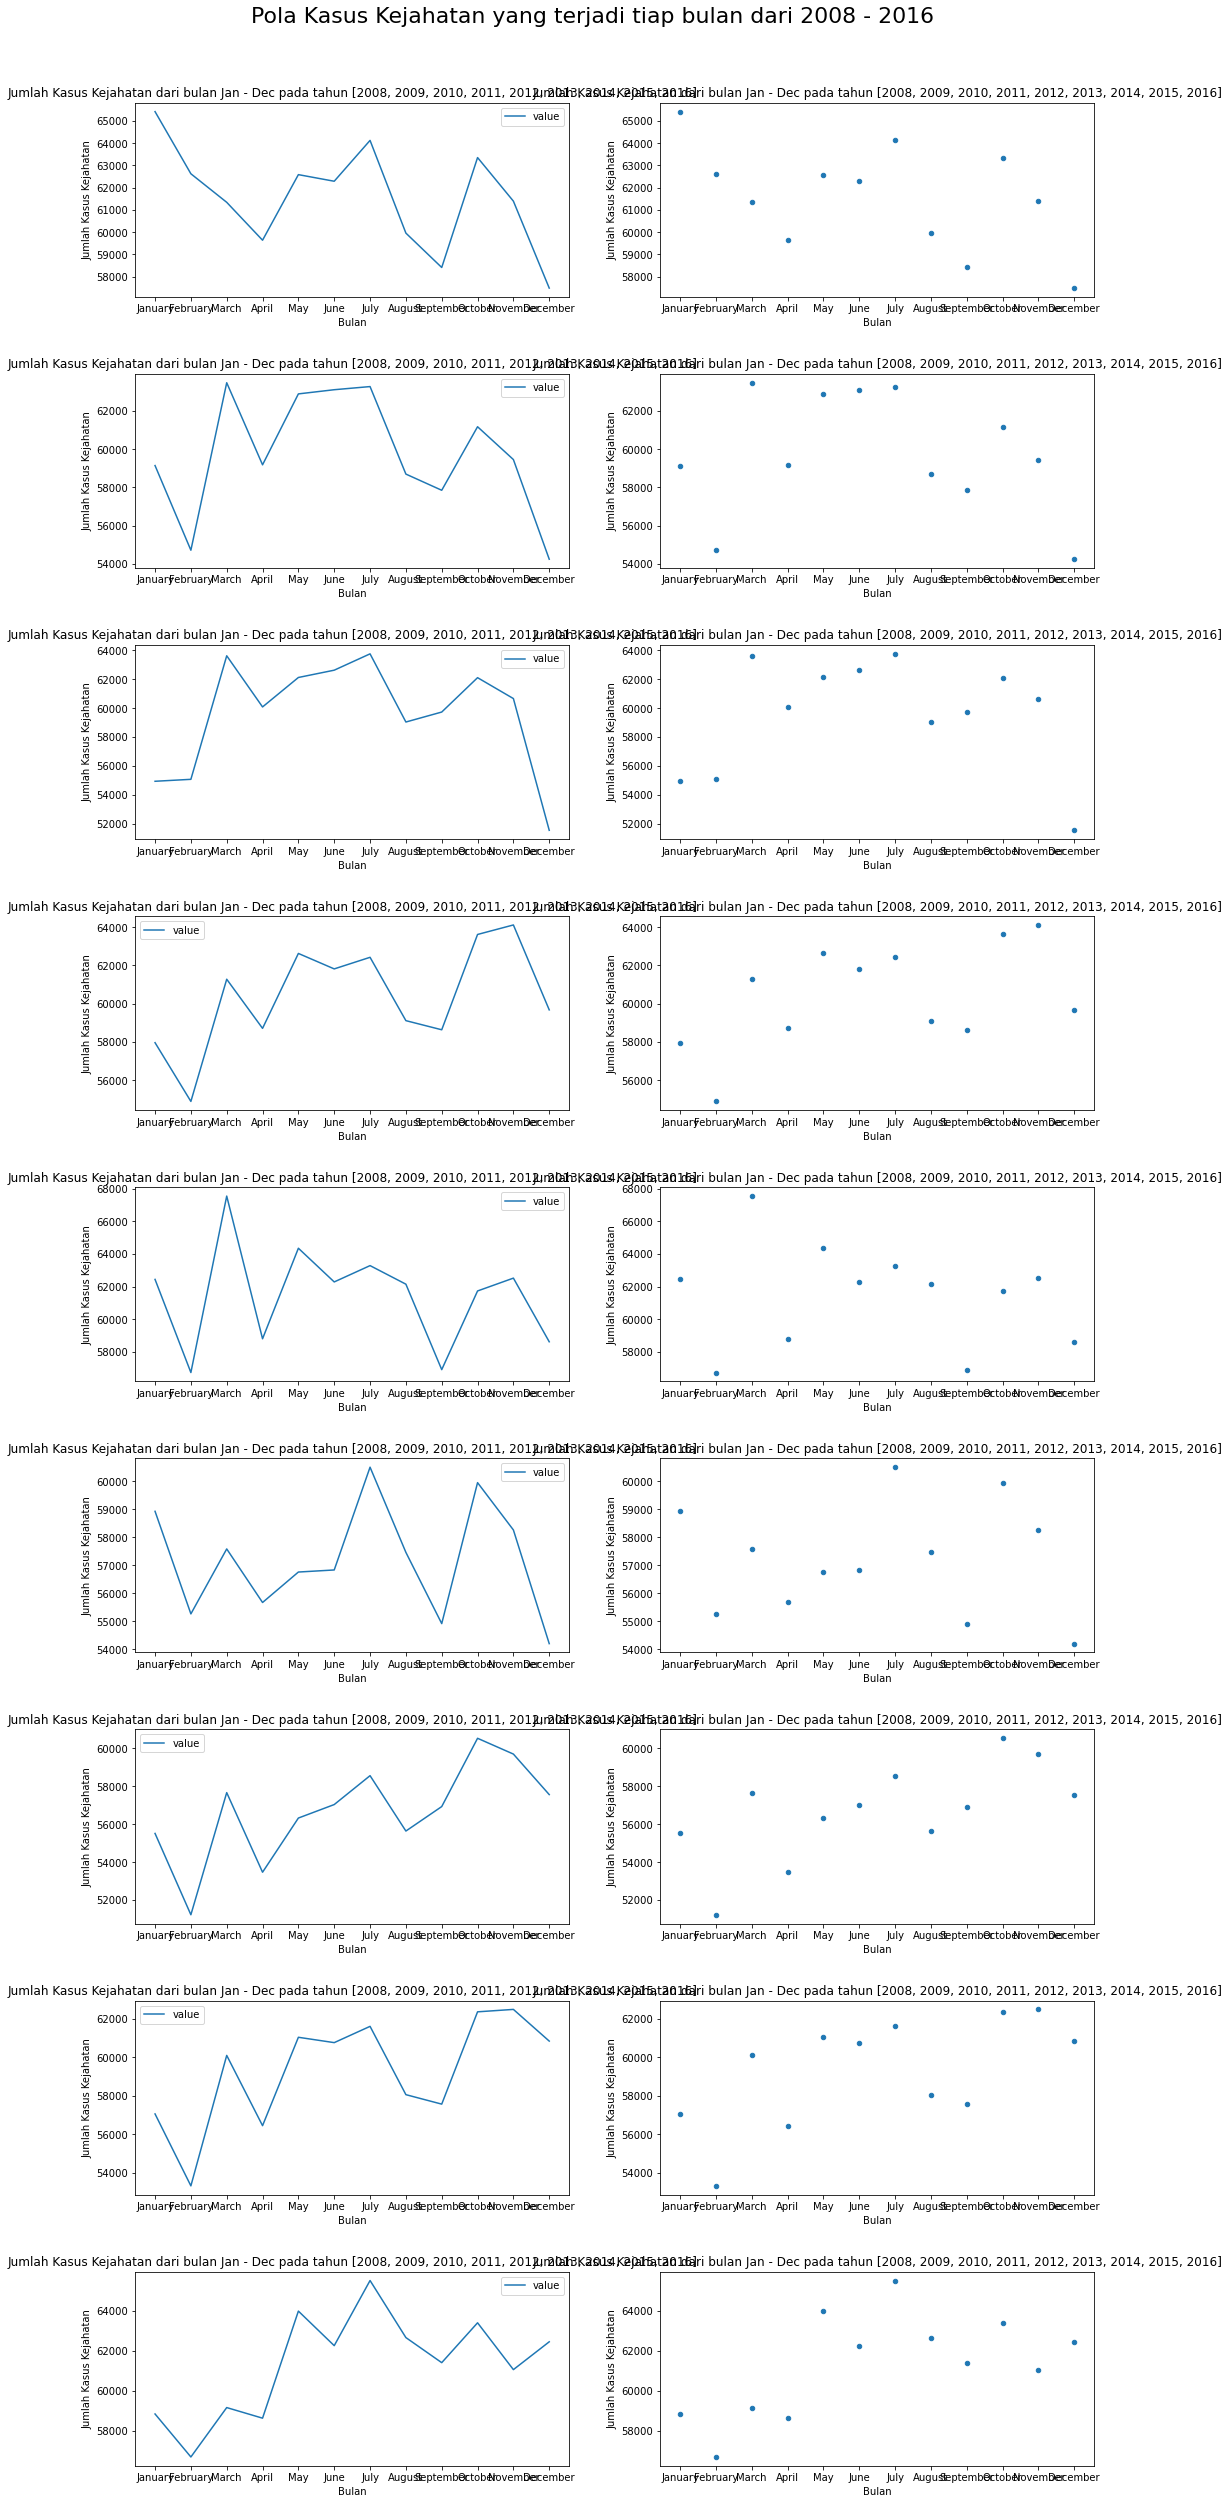

In [131]:
n_rows = int(len(tahun))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot_number subplot dari 1

for j in tahun:
    #subplot line plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    
    #ambil data pada tahun tertentu, group berdasarkan bulan lalu sum 'Jumlah Kasus'-nya
    df = df_lsoa[
        (df_lsoa['year'] == j)
    ][['month', 'value']].groupby('month').sum()
    
    #plotting
    df.plot(
        kind='line',
        ax=ax_s[plot_number-1],
      
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    ax_s[plot_number-1].set_xticks(bulan_angka)
    ax_s[plot_number-1].set_xticklabels(bulan_huruf)
    plot_number += 1
    
    # subplot scatter plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    df.reset_index(inplace=True)
    df.columns = ['month', 'value']
    df.plot(
        kind='scatter',
        x='month',
        y='value',
        ax=ax_s[plot_number-1],
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    # mengubah index dan labels pada sumbu x agar diganti menjadi nama bulan
    ax_s[plot_number-1].set_xticks(bulan_angka)
    ax_s[plot_number-1].set_xticklabels(bulan_huruf)
    
    #increment plot_number in each itteration
    plot_number += 1

fig.suptitle("Pola Kasus Kejahatan yang terjadi tiap bulan dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

Terdapat pola yang menarik dari kasus kejahatan yang terjadi. 
1. Dari tahun 2008 - 2016, **mayoritas** kasus kejahatan terjadi **penurunan** dari bulan **Januari - Februari** dan terjadi **peningkatan** dari bulan **Februari - Maret**. Peningkatannya juga terbilang relatif tinggi dalam rentang tahun **2009 - 2012, 2014** yang rata-rata peningkatannya lebih dari **5000an** kasus hanya dalam sebulan. 
2. Dalam rentang 1 bulan dari **Maret - April**, terjadi **penurunan** pada kasus kejahatan. Penurunannya terbilang relatif tinggi dalam rentang tahun tersebut mulai dari **4000an** sampai **8000an** penurunan kasus.
3. Dalam rentang **April - Oktober** kasus kejahatan mengalami **fluktuasi** kadang naik dan kadang turun.
4. Dalam interval **Oktober - Desember** kasus kejahatan kembali mengalami **penurunan** hampir mayoritas di setiap tahun dari tahun **2008 - 2016**

## Word Clouds <a id="8"></a>


`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

>1. Tampilkan word cloud untuk kejahatan mayor yang terjadi pada tahun 20016!

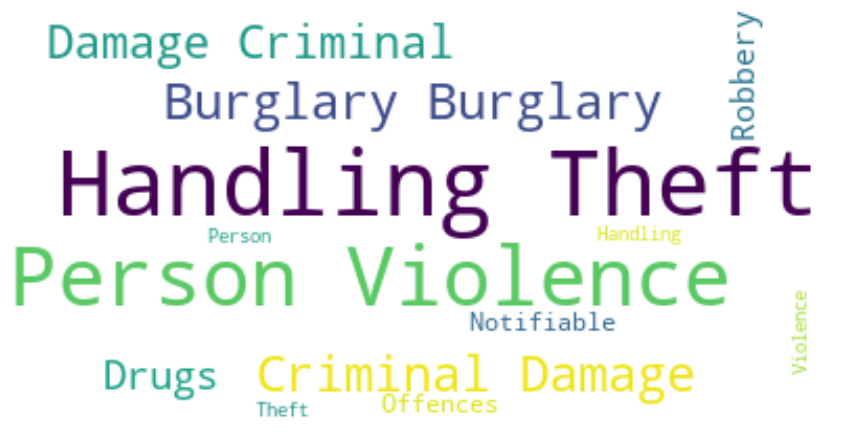

In [135]:
#buat dataframe baru yang mengambil data yang tahunnya 2016, lalu dipilih hanya kolom 'Kejahatan Mayor' dan 'Jumlah Kasus'
df_word_cloud = df_lsoa[
    df_lsoa['year']==2016
][['major_category','value']]



# menjumlahkan total kasus kejahatan berdasarkan "Kejahatan Mayor"
df_word_cloud = df_word_cloud.groupby('major_category').sum()
df_word_cloud.index.name = None

# hitung sum dari 'Jumlah Kasus'
total_keseluruhan_kasus = df_word_cloud['value'].sum()

# mengatur kata maksimum untuk proporsi dalam word cloud
max_words = 100

#inisialisasi string kosong untuk menampung cloning 'Kejahatan Mayor' sebanyak persentasenya
word_string = ''

#lakukan perulangan untuk setiap 'Kejahatan Mayor' yang ada
for crime_cat in df_word_cloud.index.values:
    # lakukan copy string 'Kejahatan Mayor' sebesar proporsinya terhadap keseluruhan kasus
    repeat_num_crime_cat = int(
        df_word_cloud.loc[crime_cat, 'value']/float(total_keseluruhan_kasus)*max_words)
    # concat ke word_string sejumlah repeat_num_crime_cat
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

# Instansiasi objek WordCloud dengan warna background putih
crime_category_word_cloud = WordCloud(
    background_color='white'
)
#generate word_string ke dalam objek Word CLoud
crime_category_word_cloud.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Display the word cloud
plt.imshow(crime_category_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

>1. Gambarkan peta London dengan zoom start = 9!

In [136]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(
    location=[london_lattitude, london_longitude],
    zoom_start=9
)

# display London Map
london_map

# Overall Analysis
***
Kesimpulan analisis yang bisa diambil adalah: <br>
>1. Dalam rentang tahun 2008 sampai 2016, tindakan kejahatan cenderung menurun diawal musim dingin bulan desember hingga februari, dan meningkat setelah berakhirnya musim dingin pada bulan maret.
>2. Wilayah Westminster menjadi wilayah di London dengan angka kriminalitas tertinggi dan wilayah City of London menjadi wilayah dengan angka kriminalitas terendah dalam rentang tahun 2008 - 2016.
>3. Rata-rata total kasus kejahatan yang terjadi untuk seluruh wilayah di London berada dalam kisaran sekitar 23.000an - 26.000an kejadian dalam rentang tahun 2008 - 2016.
>4. Kasus kejahatan *Theft and Handling* paling sering terjadi, sedangkan kasus kejahatan *Sexual Offences* sangat jarang terjadi di kota London dalam rentang 2008 - 2016.
>5. Kasus kejahatan *Violence Against the Person* mengalami peningkatan yang lebih signifikan dibandingkan *Theft and Handling* pada tahun 2014 sampai 2016 di kota London 
>6. kenaikan trending dari kategori kejahatan minor yaitu harassment dan common assault perlu menjadi perhatian agar tidak terus meningkat di tahun selanjutnya karena 3 tahun terakhir mengalami tren kenaikan

Thanks For Completing This Labs!